# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# 1. Read the dataset given in file named 'bigcity.csv'.

In [1]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("bigcity.csv")
dataframe.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 2. Transform the dataset (0.5 points)
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [2]:
X = dataframe["u"]
Y = dataframe["x"]

# 3. Check the dataset for any missing values and also print out the correlation matrix (0.5 points)
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [3]:
dataframe[dataframe.isna().any(axis=1)]

,Unnamed: 0,u,x


In [4]:
dataframe.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 4. Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [6]:
X_train.head()

10     38
35    172
30     94
11     46
36     66
Name: u, dtype: int64

In [7]:
X_test.head()

34    120
42     40
39     44
2      61
12     71
Name: u, dtype: int64

In [8]:
y_train.head()

10     52
35    183
30     85
11     53
36     86
Name: x, dtype: int64

In [9]:
y_test.head()

34    115
42     64
39     58
2      69
12     79
Name: x, dtype: int64

# 5. Find coefficients & intercept (0.5 points)
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [10]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(np.array(X_train).reshape((-1, 1)),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
b1 = reg.coef_
b1

array([1.14878411])

In [12]:
b0 = reg.intercept_
b0

10.286292648637328

# 6.  Linear Relationship between feature and target (0.5 points)
Plot the line with b1 and b0 as slope and y-intercept.

Text(0, 0.5, 'x')

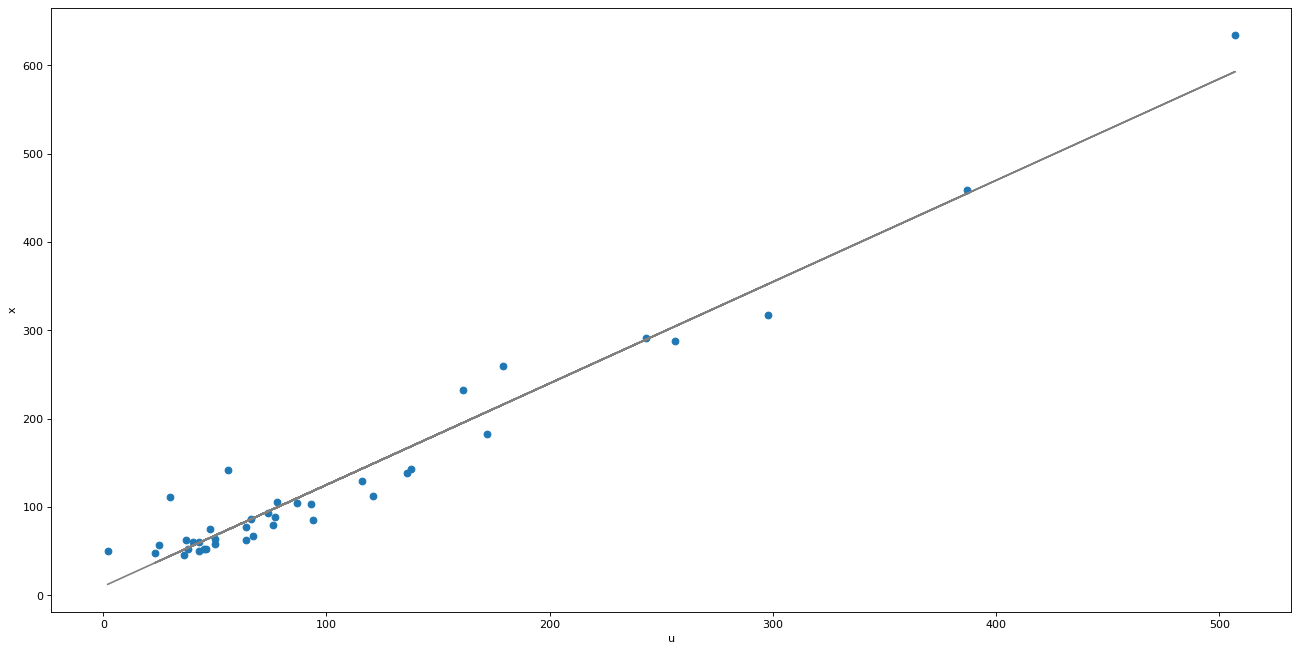

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(20, 10), dpi=80)
plt.scatter(X_train, y_train)
y_train_pred = b0 + b1*X_train
plt.plot(X_train, y_train_pred, color = "gray") 
plt.xlabel('u') 
plt.ylabel('x')

In [14]:
from sklearn.metrics import r2_score
R2_train = r2_score(y_train, y_train_pred)
R2_train

0.9582188935876234

# 7. Evaluation of model with scikit-learn (0.5 points)
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error gives you root mean square error

Text(0, 0.5, 'x')

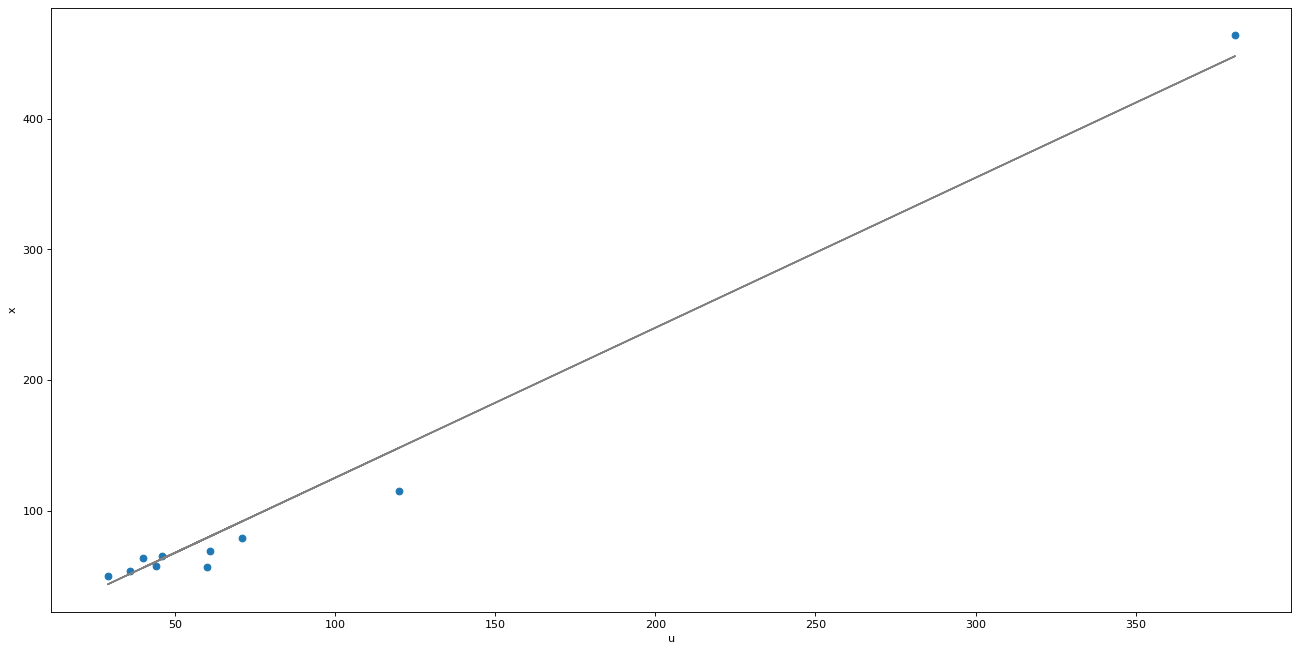

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(20, 10), dpi=80)
plt.scatter(X_test, y_test)
y_test_pred = b0 + b1*X_test
plt.plot(X_test, y_test_pred, color = "gray") 
plt.xlabel('u') 
plt.ylabel('x')

In [16]:
from sklearn.metrics import r2_score
y_test_pred = b0 + b1*X_test
R2_test = r2_score(y_test, y_test_pred)
R2_test

0.9843318450381339

# 8. Calculate the accuracy of the model for both training and test data set (0.5 points)

Hint: .score() function

In [17]:
reg.score(np.array(X_train).reshape((-1, 1)), y_train)

0.9582188935876234

In [18]:
reg.score(np.array(X_test).reshape((-1, 1)), y_test)

0.984331845038134

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   

# 2. Collect and load data

In [54]:
eda_dataframe = pd.read_csv("usedcars.csv")
eda_dataframe.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


# 3. Explore numeric variables - five number summary

In [38]:
eda_dataframe.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

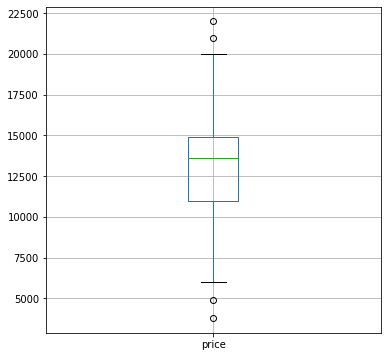

In [47]:
eda_dataframe.boxplot(column=["price"],return_type='axes',figsize=(6,6))

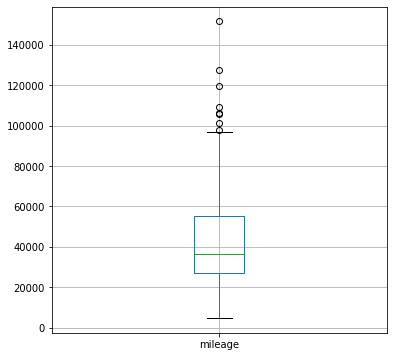

In [46]:
eda_dataframe.boxplot(column=["mileage"],return_type='axes',figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027268525488>,
      dtype=object)

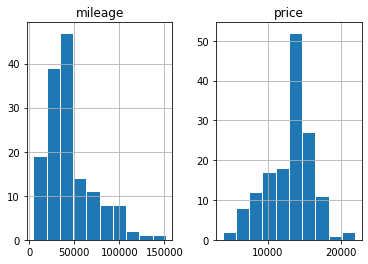

In [73]:
eda_dataframe.hist(column=["price","mileage"], bins=10, edgecolor='white')

# 4. Explore categorical variables

In [57]:
eda_dataframe.groupby("year").count()

,model,price,mileage,color,transmission
year,,,,,
2000,3,3,3,3,3
2001,1,1,1,1,1
2002,1,1,1,1,1
2003,1,1,1,1,1
2004,3,3,3,3,3
2005,2,2,2,2,2
2006,6,6,6,6,6
2007,11,11,11,11,11
2008,14,14,14,14,14


In [58]:
eda_dataframe.groupby("model").count()

,year,price,mileage,color,transmission
model,,,,,
SE,78,78,78,78,78
SEL,23,23,23,23,23
SES,49,49,49,49,49


In [59]:
eda_dataframe.groupby("color").count()

,year,model,price,mileage,transmission
color,,,,,
Black,35,35,35,35,35
Blue,17,17,17,17,17
Gold,1,1,1,1,1
Gray,16,16,16,16,16
Green,5,5,5,5,5
Red,25,25,25,25,25
Silver,32,32,32,32,32
White,16,16,16,16,16
Yellow,3,3,3,3,3


In [60]:
eda_dataframe.groupby("transmission").count()

,year,model,price,mileage,color
transmission,,,,,
AUTO,128,128,128,128,128
MANUAL,22,22,22,22,22


# 5. Explore relationships between variables using scatterplots and two-way cross tabulations

In [65]:
pd.crosstab(eda_dataframe["model"], eda_dataframe["color"], margins=True, margins_name="Total")

color,Black,Blue,Gold,Gray,Green,Red,Silver,White,Yellow,Total
model,,,,,,,,,,
SE,19,9,1,7,4,12,11,14,1,78
SEL,3,3,0,5,1,2,7,1,1,23
SES,13,5,0,4,0,11,14,1,1,49
Total,35,17,1,16,5,25,32,16,3,150


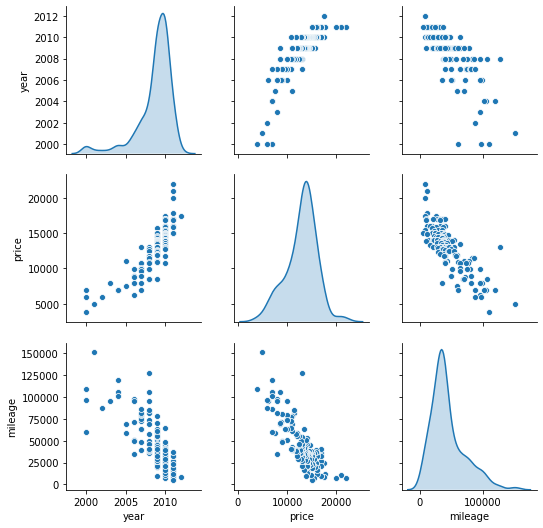

In [66]:
import seaborn as sns
sns.pairplot(eda_dataframe, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [71]:
eda_dataframe.corr()

,year,price,mileage
year,1.000000,0.845004,-0.760313
price,0.845004,1.000000,-0.806149
mileage,-0.760313,-0.806149,1.000000
